<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/5.%20Object%20Detection%20with%20OpenCV%20and%20Python/3_ObjectDetection_OpenCV_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection with OpenCV and Python 

In this section, we will cover the <b> Edge Detection (Also Canny Edge Detection)</b>

- Developed by John Canny in 1986 which is a multi stage algorithm to detect a wide range of edges in images
- Steps to use Canny Edge Detection:
 - Apply Gaussian filter to smooth the image in order to remove the noise
 - Find the intensity gradients of the image
 - Apply non-maximum suppression to get rid of spurious response to edge detection
 - Apply double threshold to determine potential edges
 - Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

***Need user to decide on low and high threshold values***



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

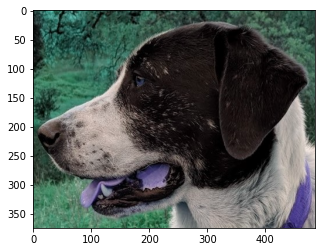

In [2]:
img = cv2.imread('sammy_face.jpg')
plt.imshow(img) #here we are not concerned about image color change as we are performing edge detection

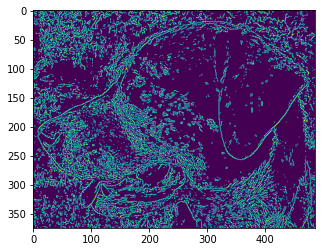

In [3]:
edges = cv2.Canny(image=img,
                  threshold1=127,
                  threshold2=127) #setting both threshold as median values
plt.imshow(edges)

With median threshold values, it is piackign edges but also a lot noise, so we can use two different approaches:

- Blurring images and get rid of certain details 
- Playing around threshold values or choose the formula to work on threshold value

In [4]:
med_value = np.median(img)
med_value

64.0

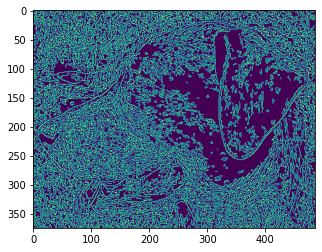

In [5]:
#lower and upper limit of threshold

lower = int(max(0,0.7*med_value)) #lower threshold = 0 or 70% of emdian value whichever is greater
upper = int(min(255,1.3*med_value)) #upper threshold is 30% above threshold or 255 whichever is smaller

edges = cv2.Canny(image=img,
                  threshold1=lower,
                  threshold2=upper)
plt.imshow(edges)

It is still not good and need to start adjusting threshold values

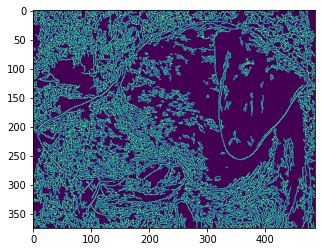

In [6]:
edges = cv2.Canny(image=img,
                  threshold1=lower,
                  threshold2=upper+100)
plt.imshow(edges)

It is still an average results so we nned to use first approach of blurring

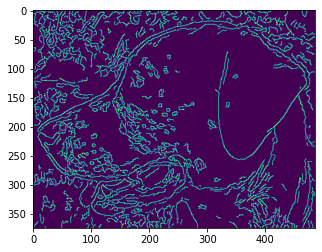

In [7]:
blurred_img = cv2.blur(img,ksize=(5,5))

edges = cv2.Canny(image=blurred_img,
                  threshold1=lower,
                  threshold2=upper)
plt.imshow(edges)

Much imrpoved edge detection than second approach

To further improve we can either:
- increase kernel size
- adjust lower and upper threshold values

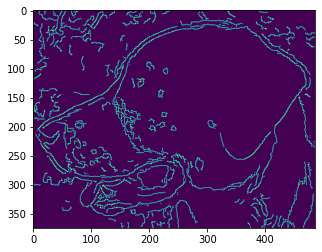

In [8]:
#increasing kernel size

blurred_img = cv2.blur(img,ksize=(7,7))

edges = cv2.Canny(image=blurred_img,
                  threshold1=lower,
                  threshold2=upper)
plt.imshow(edges)

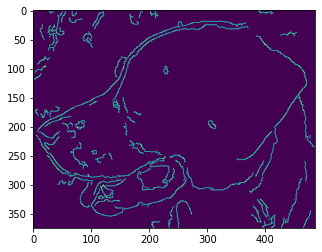

In [9]:
#increasing upper threshold value

blurred_img = cv2.blur(img,ksize=(6,6))

edges = cv2.Canny(image=blurred_img,
                  threshold1=lower,
                  threshold2=upper+50)
plt.imshow(edges)